In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [2]:
data = pd.read_csv("tinder_google_play_reviews.csv")
print(data.head())

                               reviewId                userName  \
0  4ecc6792-963b-4b63-a0e4-c5c12751d5b7  Nik Nik Muhammad lutfi   
1  793ca9e7-ffef-44bc-b6a3-1392c007f357            Jasper Henry   
2  ff709984-1036-4c8b-8d55-e9f538f44ca6         Toby Sutherland   
3  8662f79b-5a7e-42e6-b822-1c665262634d           Sparky Cherry   
4  75b99933-a39a-43de-ba6d-1c337fa863ee                 Michael   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AAcHTt...   
1  https://play-lh.googleusercontent.com/a-/AD_cM...   
2  https://play-lh.googleusercontent.com/a-/AD_cM...   
3  https://play-lh.googleusercontent.com/a/AAcHTt...   
4  https://play-lh.googleusercontent.com/a/AAcHTt...   

                                             content  score  thumbsUpCount  \
0                                               Good      4              0   
1  Wow what a Con yall got going. Wow you upgrade...      1              0   
2  Deleted my account a fe

On the first impressions of this dataset, I can see some null values in some columns. To analyze the Tinder reviews, we only need the content column. So let’s create a new dataset with the content column and move further:

In [3]:
data = data[["content"]]

In [4]:
data.isnull().any()

content    True
dtype: bool

In [5]:
data = data.dropna()

Now let’s prepare this data for the task of sentiment analysis. Here we have to clean the text in the content column:

In [6]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now let’s have a look at the kind of words people use in the reviews of Tinder:

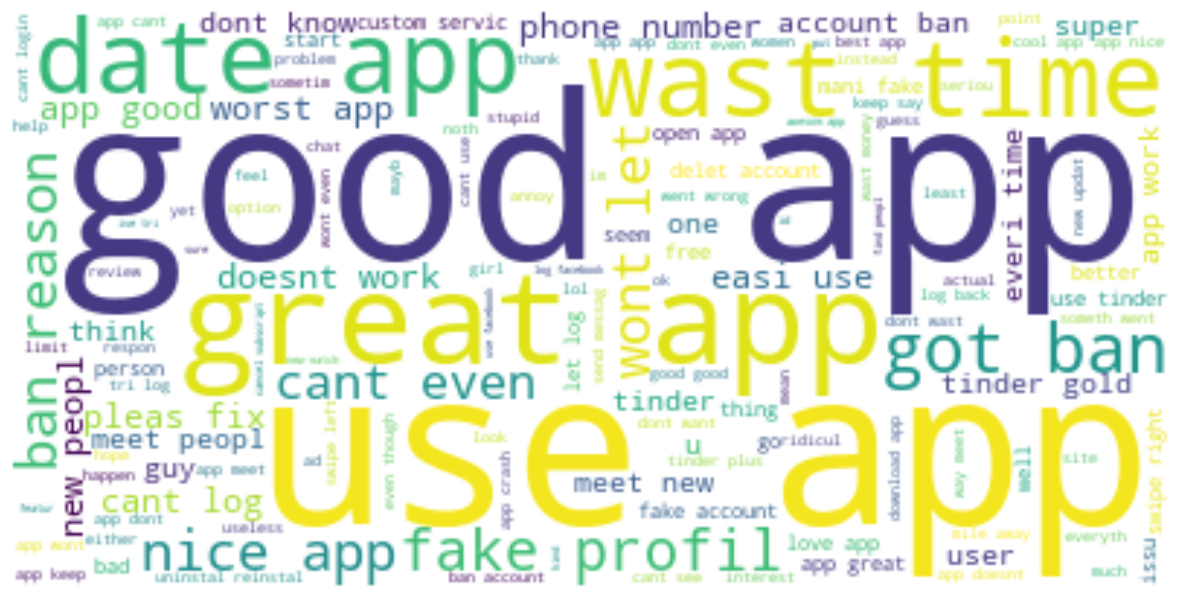

In [7]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews:

In [8]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             content  Positive  Negative  \
0                                               good     1.000     0.000   
1  wow con yall got go wow upgrad want upgrad tin...     0.607     0.000   
2  delet account time tinder doesnt anyth spam ac...     0.057     0.323   
3  app horribl ban app reason without explan wors...     0.055     0.233   
4     app use free option want charg everyth possibl     0.434     0.000   

   Neutral  
0    0.000  
1    0.393  
2    0.620  
3    0.712  
4    0.566  


Now let’s have a look at the kind of words people use in the positive reviews of Tinder

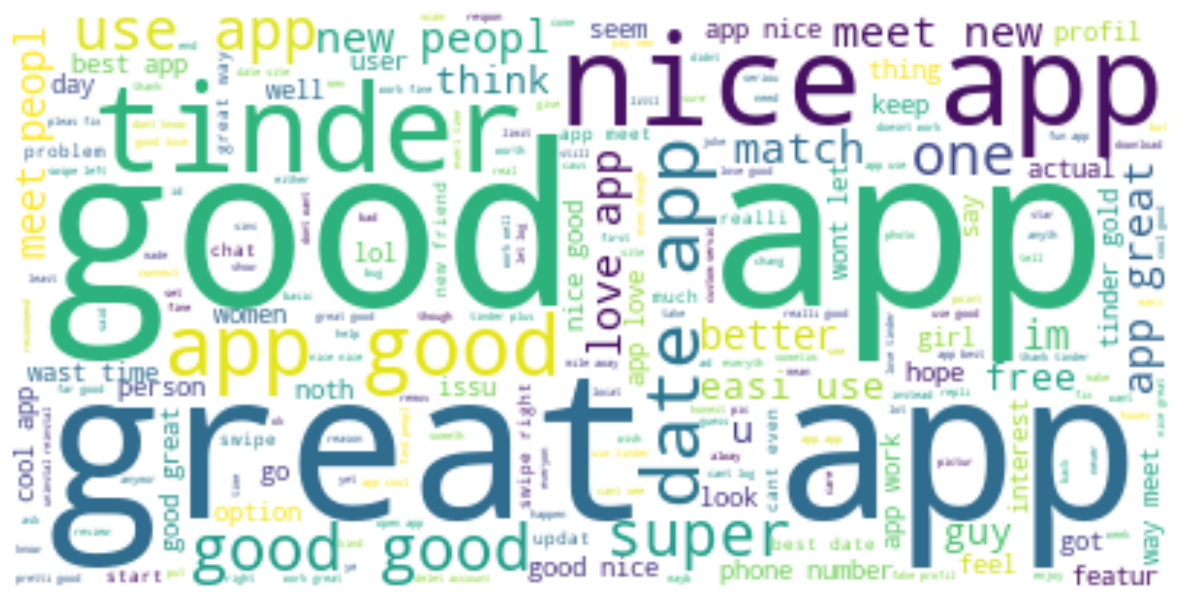

In [9]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the kind of words people use in the negative reviews of Tinder:

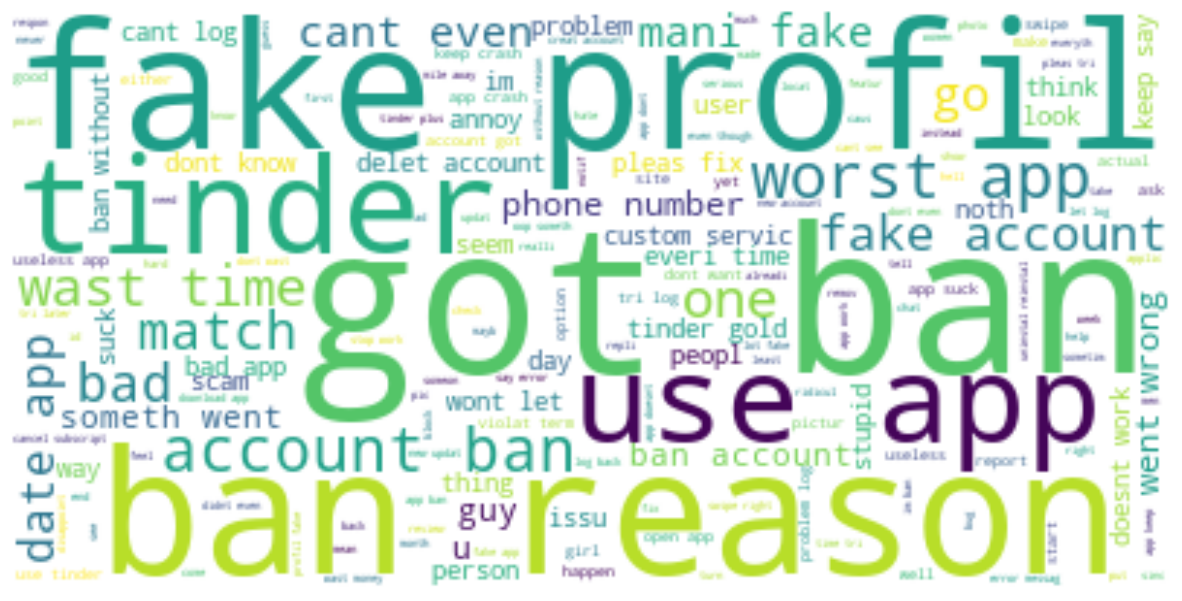

In [10]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Let’s have a look at the overall sentiment score of the users of Tinder:

In [11]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


So most of the users write reviews neutrally. Let’s have a look at the total of all the sentiment scores:

In [12]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  172342.90900002647
Negative:  68730.94699999773
Neutral:  348086.12899995106


As you can see, the positive is much more than the negative, we can say that most users are happy with Tinder.



# Summary

So this is how you can perform the task of Tinder reviews sentiment analysis using Python. Tinder is one of the most popular dating applications. It connects people having similar interests. I hope you liked this article on Tinder reviews sentiment analysis.